In [4]:
# Import all dependencies
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Read stats history csv file from locust export folder
stats_history_df = pd.read_csv('./stats/sample_stats_history.csv', sep=",")

In [6]:
# Remove useless row

# stats_history_df = stats_history_df[stats_history_df.Name != "Aggregated"]

In [7]:
# timestamp to datetime
stats_history_df["datetime"] = stats_history_df["Timestamp"].apply(lambda t: datetime.fromtimestamp(t))

In [10]:
f_df = pd.read_csv('./stats/sample_failures.csv', sep=",")
local_df = f_df[f_df.Name == 'GetHome']
local_df = local_df[local_df.Error == "429 Rate Limit"]
local_df.Occurrences.iloc[0]

2

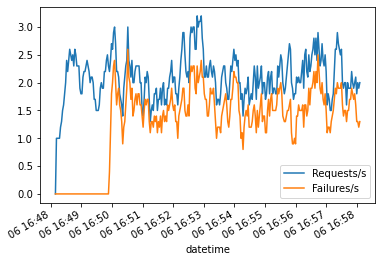

In [8]:
# Draw plot for request/s
# plt.cla()
ax1 = plt.gca()
stats_history_df = stats_history_df[stats_history_df.Name == "GetHome"]
stats_history_df.plot(x="datetime", y="Requests/s", ax=ax1)
stats_history_df.plot(x="datetime", y="Failures/s", ax=ax1)
# stats_history_df.plot(kind="scatter", x="datetime", y="Requests/s", color="red", ax=ax1)
plt.show()

In [9]:
plt.savefig('request_per_second.png', format="png")

<Figure size 432x288 with 0 Axes>

In [10]:
plt.close()

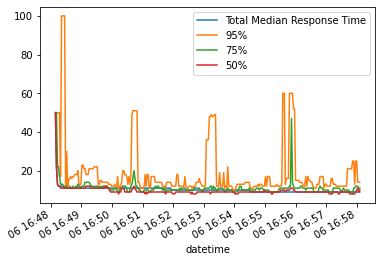

In [11]:
# draw plot for response times
ax2 = plt.gca()
stats_history_df.plot(x="datetime", y="Total Median Response Time", ax=ax2)
stats_history_df.plot(x="datetime", y="95%", ax=ax2)
stats_history_df.plot(x="datetime", y="75%", ax=ax2)
stats_history_df.plot(x="datetime", y="50%", ax=ax2)
# stats_history_df.plot(kind="scatter", x="datetime", y="Total Min Response Time", ax=ax2,color="green")
# stats_history_df.plot(kind="scatter", x="datetime", y="Total Max Response Time", ax=ax2, color="red")
plt.show()

In [12]:
plt.savefig('response_time.png', format="png")

<Figure size 432x288 with 0 Axes>

In [13]:
plt.close()

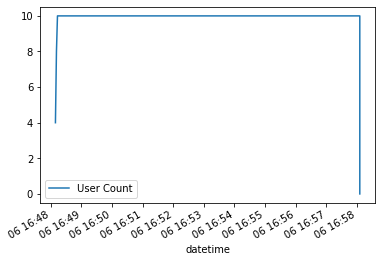

In [14]:
# draw plot for number of users simulated
ax2 = plt.gca()
stats_history_df.plot(x="datetime", y="User Count", ax=ax2)
plt.show()

In [15]:
# DataFrame display x%ile

percentile_df = stats_history_df[["50%","66%","75%","80%","90%","95%","98%","99%","99.9%","99.99%","99.999%","100%"]]
percentile_df

,50%,66%,75%,80%,90%,95%,98%,99%,99.9%,99.99%,99.999%,100%
1,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
4,22.0,22.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
7,13.0,13.0,22.0,22.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
10,12.0,13.0,22.0,22.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
13,12.0,12.0,17.0,17.0,22.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10.0,12.0,12.0,12.0,14.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
889,11.0,11.0,12.0,12.0,13.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
892,9.0,11.0,11.0,12.0,12.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
895,10.0,11.0,11.0,11.0,12.0,14.0,21.0,21.0,21.0,21.0,21.0,21.0


In [16]:
stats_history_df[["Requests/s", "50%","66%","75%","80%","90%","95%","98%","99%","99.9%","99.99%","99.999%","100%"]].mean()

Requests/s     2.101000
50%            9.580000
66%           10.143333
75%           11.220000
80%           11.716667
90%           14.250000
95%           18.980000
98%           21.826667
99%           21.826667
99.9%         21.826667
99.99%        21.826667
99.999%       21.826667
100%          21.826667
dtype: float64

In [ ]:
stats_history_df[["Requests/s", "50%","66%","75%","80%","90%","95%","98%","99%","99.9%","99.99%","99.999%","100%"]].mean().to_dict()

In [17]:
stats_history_home_df = stats_history_df[stats_history_df.Name == "GetHome"]

{'Requests/s': 2.101000000000001,
 '50%': 9.58,
 '66%': 10.143333333333333,
 '75%': 11.22,
 '80%': 11.716666666666667,
 '90%': 14.25,
 '95%': 18.98,
 '98%': 21.826666666666668,
 '99%': 21.826666666666668,
 '99.9%': 21.826666666666668,
 '99.99%': 21.826666666666668,
 '99.999%': 21.826666666666668,
 '100%': 21.826666666666668}

In [17]:
stats_history_home_df = stats_history_df[stats_history_df.Name == "GetHome"]

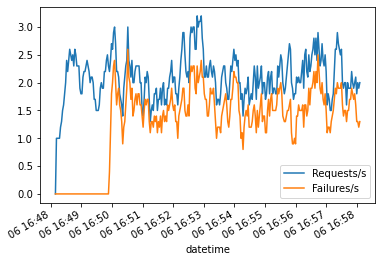

In [18]:
# Draw plot for request/s for GetHome
ax1 = plt.gca()
stats_history_home_df.plot(x="datetime", y="Requests/s", ax=ax1)
stats_history_home_df.plot(x="datetime", y="Failures/s", ax=ax1)
# stats_history_df.plot(kind="scatter", x="datetime", y="Requests/s", color="red", ax=ax1)
plt.show()

In [21]:
dict(tuple(stats_history_df.groupby('Name')))

{'GetHome':       Timestamp  User Count Type     Name  Requests/s  Failures/s   50%   66%  \
 1    1591454889           4  GET  GetHome         0.0         0.0  50.0  50.0   
 4    1591454891           8  GET  GetHome         1.0         0.0  22.0  22.0   
 7    1591454893          10  GET  GetHome         1.0         0.0  13.0  13.0   
 10   1591454895          10  GET  GetHome         1.0         0.0  12.0  13.0   
 13   1591454897          10  GET  GetHome         1.0         0.0  12.0  12.0   
 ..          ...         ...  ...      ...         ...         ...   ...   ...   
 886  1591455480          10  GET  GetHome         1.8         1.3  10.0  12.0   
 889  1591455482          10  GET  GetHome         2.0         1.3  11.0  11.0   
 892  1591455484          10  GET  GetHome         1.9         1.2   9.0  11.0   
 895  1591455486          10  GET  GetHome         2.0         1.3  10.0  11.0   
 898  1591455486           0  GET  GetHome         2.0         1.3  10.0  11.0   
 
   